# In this notebook, we compare the computed eigenvalues of the eigenpotentials for methane molecule

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
%config InlineBackend.figure_format = 'svg'
# plt.rcParams['font.size'] = 15

In [2]:
def get_wstat_eigenvalues(fname):
    eigens = []
    try:
        f = open(fname,'r')
    except:
        raise FileNotFoundError(fname)
    f.readline()
    line = f.readline()
    while line != '':
        eigens.append(float(line.split()[1]))
        line = f.readline()
    return eigens

In [3]:
eigenvals = []
fname = "./G2_97/CH4-PBE/wstat/o-wstat.converged.tab"
eigenvals.append(get_wstat_eigenvalues(fname))
eigenvals = np.array(eigenvals)

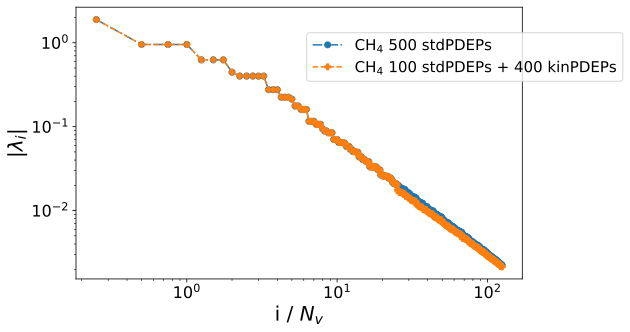

In [4]:
mix_eigens = []
moles = ['CH4']
Nv = [4]
labels = [r'$\mathrm{CH_4}$']
fname = './G2_97/CH4_100_400.txt'
df = pd.read_csv(fname,names=['eig'])
mix_eigens.append(df['eig'].values)
mix_eigens = np.array(mix_eigens)

fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(1):
    plt.loglog(np.arange(1,1+len(eigenvals[i]))/Nv[i],-eigenvals[i],label=labels[i]+" 500 stdPDEPs",ls='-.',marker="o")
    
for i in range(1):
    plt.loglog(np.arange(1,1+len(mix_eigens[i]))/Nv[i],-mix_eigens[i],label=labels[i]+" 100 stdPDEPs + 400 kinPDEPs",ls='--',marker="P")

# ax.axvline(x=100/Nv[0],c='r')
plt.legend(fontsize=15,bbox_to_anchor=(0.5, 0.7))
plt.xlabel(r'i / $N_v$',fontsize=20)
plt.ylabel(r'$|\lambda_i|$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_yscale('log')
plt.show()
# fig.savefig("fig/Compare_PDEP_eigenvals_and_mix_eigenvals.eps",bbox_inches="tight")
# fig.savefig("fig/Compare_PDEP_eigenvals_and_mix_eigenvals.png",bbox_inches="tight",dpi=200)